## Line Detection
* OpenCV functions **HoughLines()** and **HoughLinesP()** detect lines in an image

### How does it work?
As you know, a line in the image space can be expressed with two variables. For example:

1. In the Cartesian coordinate system: Parameters: $(m,b)$
2. In the Polar coordinate system: Parameters: $(r,θ)$

Hough Transforms, we will express lines in the Polar system. Hence, a line equation can be written as:

$y=(-\cos{\theta} \sin{\theta})x+(r\sin{\theta})$

In general for each point (x0,y0), we can define the family of lines that goes through that point as:

$y=-\frac{\cos{\theta}}{\sin{\theta}}*x+ \frac{\rho}{\sin{\theta}}$

Finally, ${\rho}=x*\cos{\theta}+y*\sin{\theta}$ which means that every line can be associated to $(\rho, \theta)$ pair


### The Standard Hough Transform

It consists in pretty much what we just explained in the previous section. It gives you as result a vector of couples $(\rho, \theta)$
In OpenCV it is implemented with the function **HoughLines()**

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


Bad key "text.kerning_factor" on line 4 in
/home/carlos/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


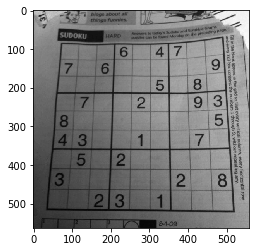

In [26]:
import cv2
import numpy as np

image = cv2.imread('../images/Sudoku.png')

# Show image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

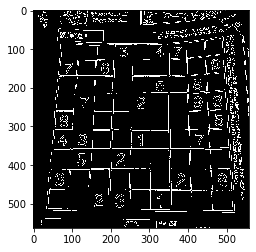

In [27]:
 # Edge detection
canny = cv2.Canny(gray, 50, 200, None, 3)
plt.imshow(canny, cmap='gray')

### Standard Hough Line Transform:
First, you apply the Transform:

```
    #  Standard Hough Line Transform
    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
```

* with the following arguments:
     * dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
     * lines: A vector that will store the parameters (r,θ) of the detected lines
     * rho : The resolution of the parameter r in pixels. We use 1 pixel.
     * theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
     * threshold: The minimum number of intersections to "*detect*" a line
     * srn and stn: Default parameters to zero. Check OpenCV reference for more info.

In [28]:
#  Standard Hough Line Transform
lines = cv2.HoughLines(canny, 1, np.pi / 180, 150, None, 0, 0)


And then you display the result by drawing the lines.


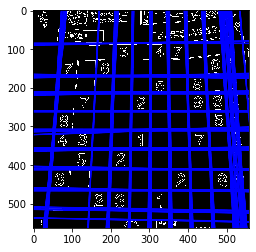

In [29]:
# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

# Draw the lines
if lines is not None:
   for i in range(0, len(lines)):
       rho = lines[i][0][0]
       theta = lines[i][0][1]
       a = np.cos(theta)
       b = np.sin(theta)
       x0 = a * rho
       y0 = b * rho
       pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
       pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
       cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
        
plt.imshow(cdst)

### Probabilistic Hough Line Transform
First you apply the transform:

```
    # Probabilistic Line Transform
    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
```

* with the arguments:
    * dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
    * lines: A vector that will store the parameters (xstart,ystart,xend,yend) of the detected lines
    * rho : The resolution of the parameter r in pixels. We use 1 pixel.
    * theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
    * threshold: The minimum number of intersections to "*detect*" a line
    * minLineLength: The minimum number of points that can form a line. Lines with less than this number of points are disregarded.
    * maxLineGap: The maximum gap between two points to be considered in the same line.


In [30]:
linesP = cv2.HoughLinesP(canny, 1, np.pi / 180, 50, None, 50, 10)
    


* And then you display the result by drawing the lines.

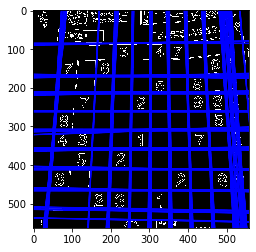

In [31]:
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

plt.imshow(cdst)

## Assignment 1
* Detecting lane lines on a binary mask
    1. Create a masks to be applied e.g. ROI (trapezoid) to lane detection
    2. Detect lane from the road appling the Hough transform
    
![image](../images/lanes_road.png)

## Assignment 2
* Using Hough transform, it is also possible to detect [circles](https://en.wikipedia.org/wiki/Circle_Hough_Transform)
   * Use the OpenCV function ```HoughCircles()``` to detect circles in an image. Take as input images the coins examples
       * More info related to ```HoughCircles``` function can be found in [OpenCV documentation](https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html)

![Image](../images/coins2.png)